In [ ]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 30.1 MB/s 
     |████████████████████████████████| 4.7 MB 44.7 MB/s 
     |████████████████████████████████| 675 kB 51.6 MB/s 
     |████████████████████████████████| 58 kB 7.4 MB/s 
     |████████████████████████████████| 812 kB 73.3 MB/s 
     |████████████████████████████████| 28.5 MB 52 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=d05d2ed2b742f94e8a1ddcc610f83a011414225c634744d20378facadf408bdf
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=69d1f181f92e0c13a1a11f03842b63f44c738a0896d6fbd72e34b6e2d2267d74
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

In [ ]:
import pandas_profiling as pp 

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import scipy
import seaborn as sns
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential 

# Question 1: ANN
- Use MELBOURNE_HOUSE_PRICE dataset (MELBOURNE_HOUSE_PRICES_LESS.csv) to precdict house prices from other features.
- Read more: https://www.kaggle.com/anthonypino/melbourne-housing-market/data
### Requirement:
- Apply ANN to build a model that predicts house prices from the provided features.
- Make new predictions for samples that have no prices in the dataset.

In [ ]:
df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')

In [ ]:
profile = pp.ProfileReport(df) 
profile 

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [ ]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


#Data Pre-processing

In [ ]:
#1. Xóa các cột không liên quan
#Xóa cột Address, SellerF, Propertycount, Date
df = df.drop(['Address', 'SellerG', 'Propertycount', 'Date'], axis=1)
df.head()

,Suburb,Rooms,Type,Price,Method,Postcode,Regionname,Distance,CouncilArea
0,Abbotsford,3,h,1490000.0,S,3067,Northern Metropolitan,3.0,Yarra City Council
1,Abbotsford,3,h,1220000.0,S,3067,Northern Metropolitan,3.0,Yarra City Council
2,Abbotsford,3,h,1420000.0,S,3067,Northern Metropolitan,3.0,Yarra City Council
3,Aberfeldie,3,h,1515000.0,S,3040,Western Metropolitan,7.5,Moonee Valley City Council
4,Airport West,2,h,670000.0,S,3042,Western Metropolitan,10.4,Moonee Valley City Council


In [ ]:
#2. Kiểm tra NaN --> chỉ có Price có NaN
df.isna().sum()

Suburb             0
Rooms              0
Type               0
Price          14590
Method             0
Postcode           0
Regionname         0
Distance           0
CouncilArea        0
dtype: int64

In [ ]:
#3. Loại bỏ những dòng bị trùng (all-columns, nếu có):
df = df.drop_duplicates()
df = df.reset_index(drop=True) 

#Phân tích đơn biến

**1. Biến liên tục**

In [ ]:
#Biến liên tục là: Postcode, Distance	

skew =  3.817628478587529 (> 0): Phan phoi lech phai
kurtosis =  18.220424753830716 (> 0): Phan phoi nhon hon phan phoi chuan
Q1 =  3053.0 , Q3 =  3165.0 , IQR =  112.0
var =  16098.33108733588 , std =  126.87919879687088


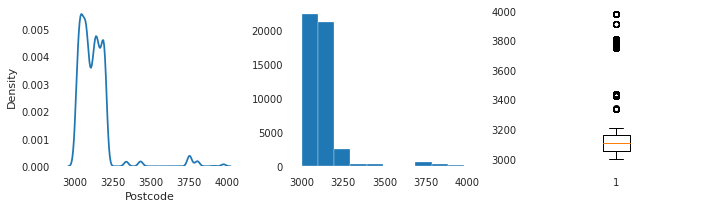

so outlier (UPPER) =  1813
so outlier (LOWER) =  0
% outlier =  3.7793667007150153 %


In [ ]:
#Postcode
Q1_Postcode= np.percentile(df.Postcode, 25)
Q3_Postcode= np.percentile(df.Postcode, 75) 
iqr_Postcode= scipy.stats.iqr(df.Postcode) 
var = df.Postcode.var()
std = df.Postcode.std() 
skew = df.Postcode.skew() 
kurtosis = df.Postcode.kurtosis() 
#---------------------------------------------------
if skew > 0:
    print('skew = ', skew, '(> 0): Phan phoi lech phai')
elif skew == 0:
    print('skew = 0: Phan phoi khong lech so voi phan phoi chuan') 
else:
    print('skew = ', skew,'(< 0): Phan phoi lech trai')

if kurtosis > 0:
    print('kurtosis = ', kurtosis, '(> 0): Phan phoi nhon hon phan phoi chuan')
elif kurtosis == 0:
    print('kurtosis = 0: Phan phoi co do nhon bang phan phoi chuan')
else:
    print('kurtosis = ', kurtosis, '(< 0): Phan phoi khong nhon bang phan phoi chuan')

print('Q1 = ', Q1_Postcode, ', Q3 = ', Q3_Postcode, ', IQR = ', iqr_Postcode)
print('var = ', var, ', std = ', std)
#Visualization
plt.figure(figsize=(10, 3), tight_layout=True)
plt.subplot(1, 3, 1) 
sns.kdeplot(df['Postcode'])
plt.subplot(1, 3, 2)
plt.hist(df['Postcode']) 
plt.subplot(1, 3, 3)
plt.boxplot(df['Postcode']) 
plt.show() 
#------------------------------------
#So outlier 
n_o_upper = df[df['Postcode'] > (Q3_Postcode+ 1.5*iqr_Postcode)].shape[0] 
n_o_lower = df[df['Postcode'] < (Q1_Postcode- 1.5*iqr_Postcode)].shape[0]  
print('so outlier (UPPER) = ', n_o_upper) 
print('so outlier (LOWER) = ', n_o_lower) 
print('% outlier = ', (n_o_upper + n_o_lower) / df.shape[0] * 100 , '%' )

skew =  1.1602285871567588 (> 0): Phan phoi lech phai
kurtosis =  2.0120092154770357 (> 0): Phan phoi nhon hon phan phoi chuan
Q1 =  6.8 , Q3 =  16.7 , IQR =  9.899999999999999
var =  58.487095735821356 , std =  7.647685645724552


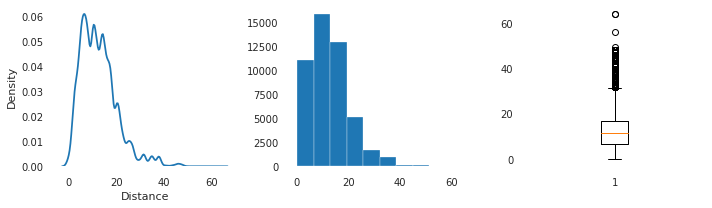

so outlier (UPPER) =  1557
so outlier (LOWER) =  0
% outlier =  3.245710950365846 %


In [ ]:
#Distance
Q1_Distance= np.percentile(df.Distance, 25)
Q3_Distance= np.percentile(df.Distance, 75) 
iqr_Distance= scipy.stats.iqr(df.Distance) 
var = df.Distance.var()
std = df.Distance.std() 
skew = df.Distance.skew() 
kurtosis = df.Distance.kurtosis() 
#---------------------------------------------------
if skew > 0:
    print('skew = ', skew, '(> 0): Phan phoi lech phai')
elif skew == 0:
    print('skew = 0: Phan phoi khong lech so voi phan phoi chuan') 
else:
    print('skew = ', skew,'(< 0): Phan phoi lech trai')

if kurtosis > 0:
    print('kurtosis = ', kurtosis, '(> 0): Phan phoi nhon hon phan phoi chuan')
elif kurtosis == 0:
    print('kurtosis = 0: Phan phoi co do nhon bang phan phoi chuan')
else:
    print('kurtosis = ', kurtosis, '(< 0): Phan phoi khong nhon bang phan phoi chuan')

print('Q1 = ', Q1_Distance, ', Q3 = ', Q3_Distance, ', IQR = ', iqr_Distance)
print('var = ', var, ', std = ', std)
#Visualization
plt.figure(figsize=(10, 3), tight_layout=True)
plt.subplot(1, 3, 1) 
sns.kdeplot(df['Distance'])
plt.subplot(1, 3, 2)
plt.hist(df['Distance']) 
plt.subplot(1, 3, 3)
plt.boxplot(df['Distance']) 
plt.show() 
#------------------------------------
#So outlier 
n_o_upper = df[df['Distance'] > (Q3_Distance+ 1.5*iqr_Distance)].shape[0] 
n_o_lower = df[df['Distance'] < (Q1_Distance- 1.5*iqr_Distance)].shape[0]  
print('so outlier (UPPER) = ', n_o_upper) 
print('so outlier (LOWER) = ', n_o_lower) 
print('% outlier = ', (n_o_upper + n_o_lower) / df.shape[0] * 100 , '%' )

**2. Biến phân loại**

In [ ]:
#biến phân loại
#Suburb, Rooms, Type, Method, Regionname, CouncilArea

In [ ]:
# #Suburb
# # print(df.Suburb.unique(), '\n')  
# print(df['Suburb'].value_counts()   ) 
# # df['Suburb'].value_counts().plot.bar() 

[ 3  2  6  4  1  5  7  8 11 10 12  9 31 16] 



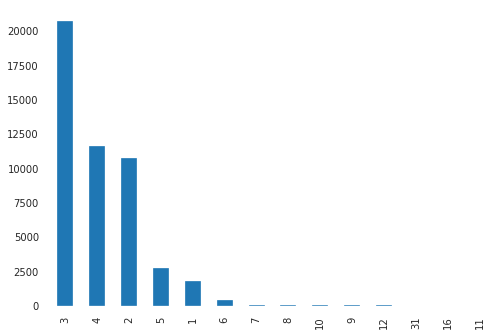

In [ ]:
#Rooms
print(df.Rooms.unique(), '\n')  
df['Rooms'].value_counts().plot.bar() 

['h' 't' 'u'] 



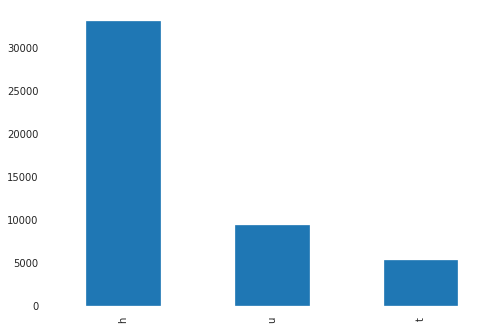

In [ ]:
#Type
print(df.Type.unique(), '\n')  
df['Type'].value_counts().plot.bar() 

['S' 'SP' 'PI' 'SN' 'VB' 'PN' 'SA' 'W' 'SS'] 



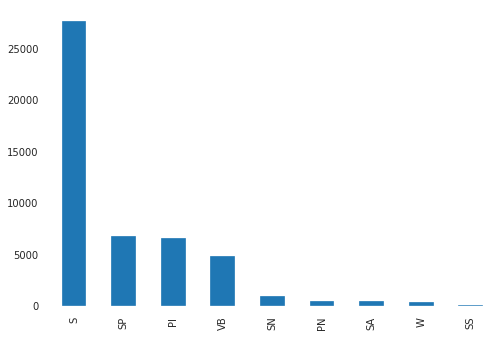

In [ ]:
#Method
print(df.Method.unique(), '\n')  
df['Method'].value_counts().plot.bar() 

['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'South-Eastern Metropolitan' 'Eastern Metropolitan' 'Northern Victoria'
 'Western Victoria' 'Eastern Victoria'] 



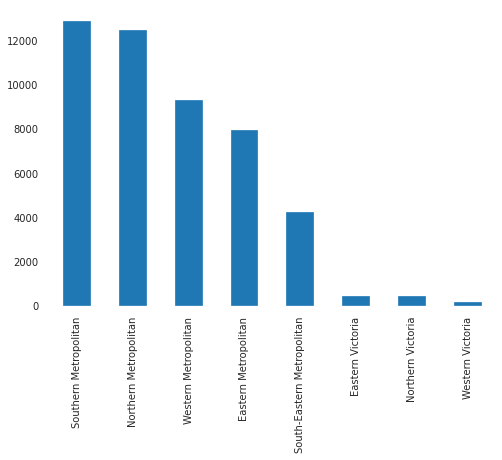

In [ ]:
#Regionname
print(df.Regionname.unique(), '\n')  
df['Regionname'].value_counts().plot.bar() 

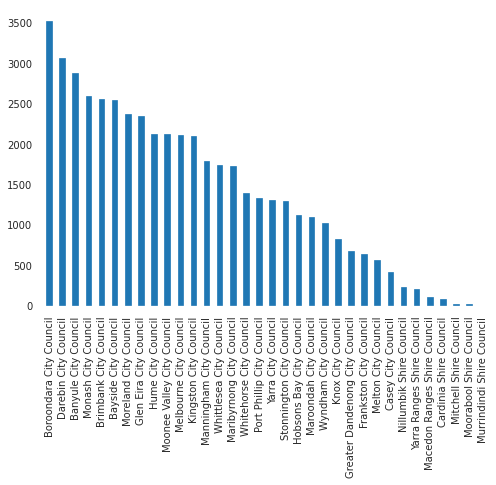

In [ ]:
#CouncilArea
df['CouncilArea'].value_counts().plot.bar() 

#Phát hiện và xử lý ngoại lệ

In [ ]:
#Tao dataframe kiem tra co can xoa outlier hay khong (df_now):
df_now = df[['Distance', 'Postcode']]

In [ ]:
#lấy những giá trị không phải outlier:
df_now = df_now[(df_now['Distance'] <= (Q3_Distance + 1.5*iqr_Distance))] #upper outlier
df_now = df_now[(df_now['Postcode'] <= (Q3_Postcode + 1.5*iqr_Postcode))] #upper outlier

In [ ]:
print('Distance:')
print('mean (before) = ',df.Distance.mean(), ', mean (after) = ', df_now.Distance.mean() )
print('chênh lệch mean (before/after - 100%) = ', (df.Distance.mean() / df_now.Distance.mean() - 1 )* 100, '%')  
print('Phải loại bỏ outlier vì chênh lệch mean trước và sau khi loại bỏ là lớn')

Distance:
mean (before) =  12.712249067146132 , mean (after) =  11.663038658267645
chênh lệch mean (before/after - 100%) =  8.996029590751009 %
Phải loại bỏ outlier vì chênh lệch mean trước và sau khi loại bỏ là lớn


In [ ]:
print('Postcode:')
print('mean (before) = ',df.Postcode.mean(), ', mean (after) = ', df_now.Postcode.mean() )
print('chênh lệch mean (before/after - 100%) = ', (df.Postcode.mean() / df_now.Postcode.mean() - 1 )* 100, '%')  
print('Không cần loại bỏ outlier vì chênh lệch mean trước và sau khi loại bỏ là không đáng kể')

Postcode:
mean (before) =  3125.3366200412747 , mean (after) =  3103.265668561895
chênh lệch mean (before/after - 100%) =  0.7112169513223687 %
Không cần loại bỏ outlier vì chênh lệch mean trước và sau khi loại bỏ là không đáng kể


**Loại bỏ outlier cột Distance**

In [ ]:
df = df[(df['Distance'] <= (Q3_Distance + 1.5*iqr_Distance))] #upper outlier
df = df.reset_index(drop=True) 

In [ ]:
df.head()

,Suburb,Rooms,Type,Price,Method,Postcode,Regionname,Distance,CouncilArea
0,Abbotsford,3,h,1490000.0,S,3067,Northern Metropolitan,3.0,Yarra City Council
1,Abbotsford,3,h,1220000.0,S,3067,Northern Metropolitan,3.0,Yarra City Council
2,Abbotsford,3,h,1420000.0,S,3067,Northern Metropolitan,3.0,Yarra City Council
3,Aberfeldie,3,h,1515000.0,S,3040,Western Metropolitan,7.5,Moonee Valley City Council
4,Airport West,2,h,670000.0,S,3042,Western Metropolitan,10.4,Moonee Valley City Council


**Chuyển các cột có dạng text sang dạng nhị phân (dummies)**

In [ ]:
df = pd.get_dummies(data=df, columns=['Suburb', 'Type', 'Method', 'Regionname', 'CouncilArea'], drop_first=True)

In [ ]:
df.head()

,Rooms,Price,Postcode,Distance,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaumaris,Suburb_Belgrave,Suburb_Belgrave Heights,Suburb_Belgrave South,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,...,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,3,1490000.0,3067,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,1220000.0,3067,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,1420000.0,3067,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,1515000.0,3040,7.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2,670000.0,3042,10.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


#Nhận xét:
* Data đã tiền xử lý dữ liệu (df) còn cột Price vẫn còn missing value
--> chia df thành 2 phần:
* df_final (df đã drop missing value), dùng để build model dự đoán
* df_new (df lọc lấy data bị missing value), dùng để dự đoán bằng model ở trên

In [ ]:
df['Price'].isna().sum() 

5190

In [ ]:
#df_final đã drop NaN
df_final = df.dropna()

In [ ]:
df_final.isna().sum()

Rooms                                     0
Price                                     0
Postcode                                  0
Distance                                  0
Suburb_Aberfeldie                         0
                                         ..
CouncilArea_Whitehorse City Council       0
CouncilArea_Whittlesea City Council       0
CouncilArea_Wyndham City Council          0
CouncilArea_Yarra City Council            0
CouncilArea_Yarra Ranges Shire Council    0
Length: 363, dtype: int64

In [ ]:
df_final.shape 

(41224, 363)

In [ ]:
#df_new lọc lấy data bị missing
df_new = df[df['Price'].isna()]

In [ ]:
df_new.head()

,Rooms,Price,Postcode,Distance,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaumaris,Suburb_Belgrave,Suburb_Belgrave Heights,Suburb_Belgrave South,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,...,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
8,6,NaN,3021,14.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,4,NaN,3028,15.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,4,NaN,3147,10.2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,4,NaN,3049,16.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,3,NaN,3104,9.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_new.shape 

(5190, 363)

#Xây dựng model dự đoán

**Chia dữ liệu thành train và test**

In [ ]:
train_X = df_final.drop(columns=['Price'])
train_X.head()

,Rooms,Postcode,Distance,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaumaris,Suburb_Belgrave,Suburb_Belgrave Heights,Suburb_Belgrave South,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Box Hill,...,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,3,3067,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,3067,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,3067,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,3040,7.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2,3042,10.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
train_y = df_final[['Price']]
train_y.head()

,Price
0,1490000.0
1,1220000.0
2,1420000.0
3,1515000.0
4,670000.0


**Scale lại train_X do có sự chênh lệch về range giữa các input**

In [ ]:
scaler_x = MinMaxScaler()
train_X = scaler_x.fit_transform(train_X)

In [ ]:
train_X[:5]

array([[0.06666667, 0.08354115, 0.0955414 , ..., 0.        , 1.        ,
        0.        ],
       [0.06666667, 0.08354115, 0.0955414 , ..., 0.        , 1.        ,
        0.        ],
       [0.06666667, 0.08354115, 0.0955414 , ..., 0.        , 1.        ,
        0.        ],
       [0.06666667, 0.04987531, 0.2388535 , ..., 0.        , 0.        ,
        0.        ],
       [0.03333333, 0.05236908, 0.33121019, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
train_y[:5]

,Price
0,1490000.0
1,1220000.0
2,1420000.0
3,1515000.0
4,670000.0


In [ ]:
n_cols = train_X.shape[1]
n_cols 

362

In [ ]:
#create model
model = Sequential()
#add model layers
model.add(Dense(182, activation='relu', input_shape=(n_cols, ))) #(362+1)/2
model.add(Dropout(rate=0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(128, activation='relu')) #cải tiến bằng cách cho học sâu thêm
model.add(Dense(1, activation='linear')) #output

In [ ]:
#compile model
model.compile(optimizer='adam', loss='mae')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_minitor = EarlyStopping(patience=10)
#train model
history = model.fit(train_X, train_y,
                    epochs=300,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping_minitor])

Epoch 1/300
1031/1031 [==============================] - 3s 3ms/step - loss: 516740.5000 - val_loss: 312233.7500
Epoch 2/300
1031/1031 [==============================] - 2s 2ms/step - loss: 266933.7812 - val_loss: 261346.5000
Epoch 3/300
1031/1031 [==============================] - 3s 2ms/step - loss: 242655.8594 - val_loss: 249982.2812
Epoch 4/300
1031/1031 [==============================] - 3s 2ms/step - loss: 231361.1406 - val_loss: 239458.8750
Epoch 5/300
1031/1031 [==============================] - 3s 2ms/step - loss: 222241.8281 - val_loss: 229857.2969
Epoch 6/300
1031/1031 [==============================] - 2s 2ms/step - loss: 213820.8281 - val_loss: 222941.7812
Epoch 7/300
1031/1031 [==============================] - 3s 2ms/step - loss: 208609.7812 - val_loss: 218220.2031
Epoch 8/300
1031/1031 [==============================] - 3s 2ms/step - loss: 204748.7031 - val_loss: 215011.3438
Epoch 9/300
1031/1031 [==============================] - 2s 2ms/step - loss: 201469.5312 - val_l

dict_keys(['loss', 'val_loss'])


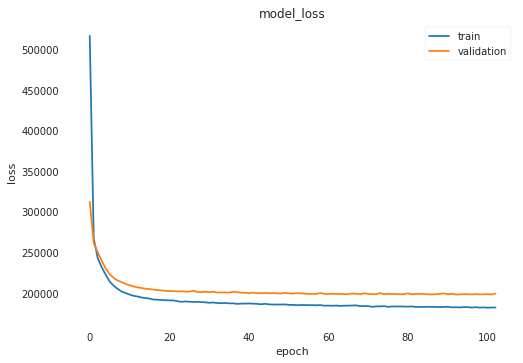

In [ ]:
print(history.history.keys())
#Loss in train and test
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model_loss') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
#evaluate the result
print('Evaluation on test data')
results = model.evaluate(train_X, train_y)
print('mae: ', results)

Evaluation on test data
1289/1289 [==============================] - 1s 1ms/step - loss: 180736.1406
mae:  180736.140625


Nhận xét:
mean(Price) = 9.9e5, mae ~ 180000 --> tỉ lệ mae/mean ~ 18%
--> Sai số cao nhưng có thể chấp nhận được

#Make prediction on new data

In [ ]:
#data NaN đã lọc ra từ đầu:
df_new.head()

,Rooms,Price,Postcode,Distance,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaumaris,Suburb_Belgrave,Suburb_Belgrave Heights,Suburb_Belgrave South,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,...,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
8,6,NaN,3021,14.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,4,NaN,3028,15.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,4,NaN,3147,10.2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,4,NaN,3049,16.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,3,NaN,3104,9.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_X_1 = df_new.drop(columns=['Price'])
train_X_1.head()

,Rooms,Postcode,Distance,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaumaris,Suburb_Belgrave,Suburb_Belgrave Heights,Suburb_Belgrave South,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Box Hill,...,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
8,6,3021,14.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,4,3028,15.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,4,3147,10.2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,4,3049,16.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,3,3104,9.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_X_1 = scaler_x.transform(train_X_1)

In [ ]:
test_y_predictions = model.predict(train_X_1)

In [ ]:
test_y_predictions[:10]

array([[ 780776.7 ],
       [ 692471.94],
       [1948649.8 ],
       [ 724873.7 ],
       [1474910.4 ],
       [1775041.2 ],
       [ 934622.4 ],
       [1084697.5 ],
       [ 728664.6 ],
       [1302552.8 ]], dtype=float32)